In [56]:
import numpy as np
from random import randint
from sklearn.utils import shuffle;
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [57]:
train_labels = []
train_samples = []

As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

In [58]:
for i in range(50):
  random_younger = randint(13,64)
  train_samples.append(random_younger);
  train_labels.append(1)

# The ~5% of older individuals who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)


In [59]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples);

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [61]:
model = Sequential([Dense(units=16, input_shape=(1,), activation='relu'), Dense(units=32, activation='relu'), Dense(units=2, activation='softmax')])

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [64]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2, validation_split=0.3)


Epoch 1/30
147/147 - 0s - loss: 0.6931 - accuracy: 0.4435 - val_loss: 0.6834 - val_accuracy: 0.5286
Epoch 2/30
147/147 - 0s - loss: 0.6750 - accuracy: 0.5483 - val_loss: 0.6668 - val_accuracy: 0.5556
Epoch 3/30
147/147 - 0s - loss: 0.6579 - accuracy: 0.6020 - val_loss: 0.6447 - val_accuracy: 0.6619
Epoch 4/30
147/147 - 0s - loss: 0.6343 - accuracy: 0.6912 - val_loss: 0.6216 - val_accuracy: 0.7429
Epoch 5/30
147/147 - 0s - loss: 0.6126 - accuracy: 0.7374 - val_loss: 0.5990 - val_accuracy: 0.7619
Epoch 6/30
147/147 - 0s - loss: 0.5889 - accuracy: 0.7667 - val_loss: 0.5715 - val_accuracy: 0.8048
Epoch 7/30
147/147 - 0s - loss: 0.5590 - accuracy: 0.7966 - val_loss: 0.5397 - val_accuracy: 0.8349
Epoch 8/30
147/147 - 0s - loss: 0.5302 - accuracy: 0.8184 - val_loss: 0.5123 - val_accuracy: 0.8571
Epoch 9/30
147/147 - 0s - loss: 0.5046 - accuracy: 0.8286 - val_loss: 0.4864 - val_accuracy: 0.8683
Epoch 10/30
147/147 - 0s - loss: 0.4799 - accuracy: 0.8449 - val_loss: 0.4618 - val_accuracy: 0.8841

In [65]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [66]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0) 

In [67]:
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [68]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[194  16]
 [  9 201]]


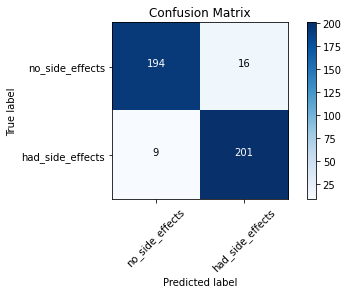

In [69]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
